In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [44]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [45]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [46]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [47]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

/var/folders/05/65bg2tns3nq_qsnl_7y8p69r0000gn/T/ipykernel_13809/2338556962.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect = True)


In [48]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [40]:
# Save references to each table
Station = base.classes.station
Measurement = base.classes.measurement

In [41]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_data_point

'2017-08-23'

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(year_ago)

2016-08-23


In [ ]:
# Perform a query to retrieve the data and precipitation scores
precipitation_score = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= year_ago, Measurement.prcp != None).\
                    order_by(Measurement.date).all()

precipitation_score

In [58]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precipitation_score, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
df.set_index('Date', inplace = True)
df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


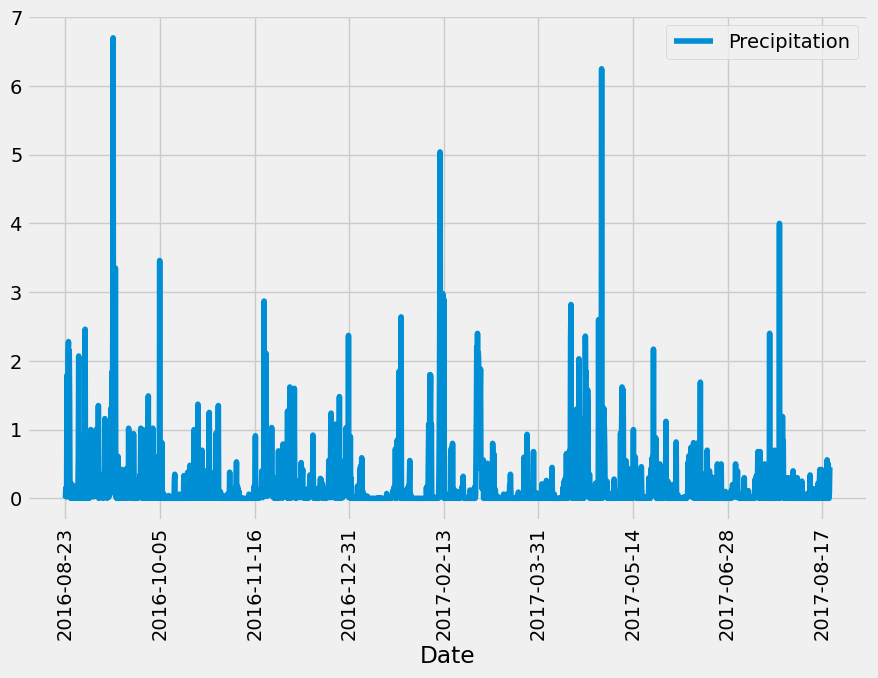

<Figure size 640x480 with 0 Axes>

In [99]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(9, 7))
plt.xticks(rotation = 90)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()
plt.savefig('Precipitation.png')

# Exploratory Station Analysis

In [66]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [70]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [75]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [78]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
results

[(54.0, 85.0, 71.66378066378067)]

In [80]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temp = session.query(Measurement.tobs).\
      filter(Measurement.date >= year_ago, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()


In [83]:
df1 = pd.DataFrame(year_temp, columns=['Tobs'])
df1.head()

,Tobs
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


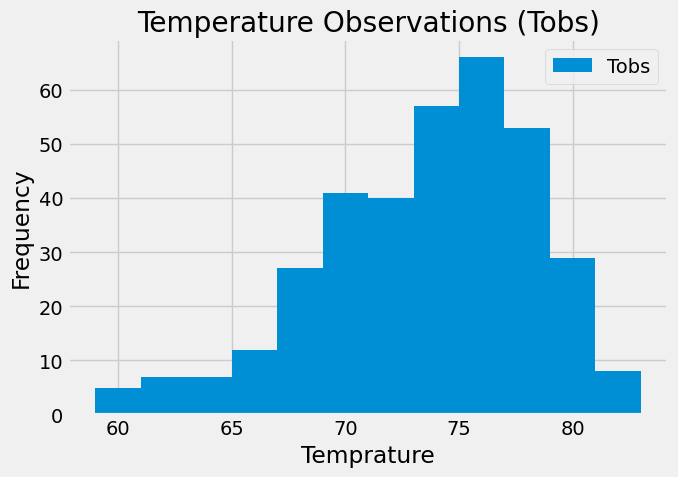

<Figure size 640x480 with 0 Axes>

In [95]:
# Plot histogram
df1.plot.hist(bins=12, figsize=(7, 5))

# Add labels and title
plt.title('Temperature Observations (Tobs)')
plt.xlabel('Temprature')
plt.ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

plt.savefig('station_histogram.png')

# Close Session

In [94]:
# Close Session
session.close()